<h2>Pré-processamento</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# carregar os dados
df = pd.read_csv('data/Tuesday-WorkingHours.pcap_ISCX.csv')

In [3]:
# explorar as primeiras 10 linhas e colunas do dataset
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,88,986,9,6,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,935,9,6,3074,3010,1537,0,341.555556,677.753294,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,389,572849,15,12,4076,1020,1646,0,271.733333,562.935859,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49193,1,2,1,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,88,1075,9,9,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
# ver as etiquetas do dataset
df[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [5]:
# converter as etiquetas do dataset em valores binários
df[' Label'] = df[' Label'].map({
    'BENIGN':0,
    'FTP-Patator':1,
    'SSH-Patator':1
})

In [6]:
# verificar 
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,88,986,9,6,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,88,935,9,6,3074,3010,1537,0,341.555556,677.753294,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,389,572849,15,12,4076,1020,1646,0,271.733333,562.935859,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,49193,1,2,1,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,88,1075,9,9,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [7]:
# truncar os pontos flutuantes do dataset para duas casas decimais
df = df.round(2)
# verificar 
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.86,107.35,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,88,900,9,4,600,2944,300,0,66.67,132.29,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1205,7,4,2776,2830,1388,0,396.57,677.27,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,88,511,7,4,452,370,226,0,64.57,110.28,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,773,9,4,612,2944,306,0,68.00,134.93,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,88,986,9,6,3100,3030,1550,0,344.44,683.49,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,88,935,9,6,3074,3010,1537,0,341.56,677.75,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,389,572849,15,12,4076,1020,1646,0,271.73,562.94,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,49193,1,2,1,0,0,0,0,0.00,0.00,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,88,1075,9,9,3100,3030,1550,0,344.44,683.49,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [8]:
# Quantidade linhas e colunas 
df.shape

(445909, 79)

In [9]:
# Colunas presentes
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [10]:
# tipos (domínios)
tipos = df.dtypes
tipos.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [11]:
# total de valores nulos ou incompletos (NaN/None)
val_nulos = df.isnull().sum()
i = len(val_nulos)
soma = 0 
for i in val_nulos:
    if i == 0:
        soma = soma + i
    else:
        soma = soma + i
print(f"Total valores nulos no dataset = {soma}")

Total valores nulos no dataset = 201


In [12]:
# percentagens de valores nulos ou incompletos que tem no datase
dados_total = np.product(df.shape)
dados_perdidos = val_nulos.sum()
percentagens = (dados_perdidos/dados_total)*100
print(f"{percentagens} %")

0.0005705881239150487 %


In [13]:
# como os valores nulos/incompletos são poucos pode-se preencher com zeros
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(0)

In [14]:
# total de valores nulos ou incompletos (NaN/None)
val_nulos = df.isnull().sum()
i = len(val_nulos)
soma = 0 
for i in val_nulos:
    if i == 0:
        soma = soma + i
    else:
        soma = soma + i
print(f"Total valores nulos no dataset = {soma}")

Total valores nulos no dataset = 0


In [15]:
# total de valores + ou - infinitos 
val_infinitos = df.isin([np.inf, -np.inf]).sum()
i = len(val_infinitos)
soma = 0
for i in val_infinitos:
    if i == 0:
        pass
    else:
        soma = soma + i
print(f"Total de valores infinitos no dataset = {soma}")

Total de valores infinitos no dataset = 327


In [16]:
# substituir os valores infinitos pelos valores nulos/incompletos (None/Nan) e depois preencher com zeros.
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(0)
df[' Flow Packets/s'] = df[' Flow Packets/s'].replace([np.inf, -np.inf], np.nan)
df[' Flow Packets/s'] = df[' Flow Packets/s'].fillna(0)

In [17]:
# verificar 
val_infinitos = df.isin([np.inf, -np.inf]).sum()
i = len(val_infinitos)
soma = 0
for i in val_infinitos:
    if i == 0:
        pass
    else:
        soma = soma + i
print(f"Total de valores infinitos no dataset = {soma}")

Total de valores infinitos no dataset = 0


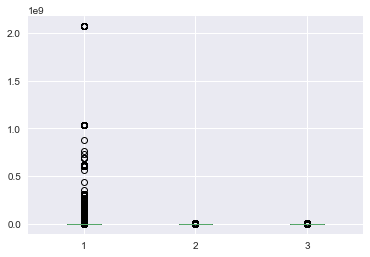

In [18]:
# identificar os outliers pelo box plot e gráfico de dispersão
plt.boxplot(df[[
    'Flow Bytes/s',
    ' Flow Packets/s',
    'Fwd Packets/s',
]])
plt.show()

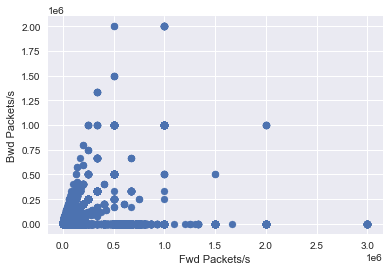

In [19]:
plt.scatter(x=df['Fwd Packets/s'], y=df[' Bwd Packets/s'])
plt.xlabel('Fwd Packets/s')
plt.ylabel('Bwd Packets/s')
plt.show()

<p> A partir dos gráficos acima pode-se conclur que, existe outliers no dataset </p>

In [20]:
# análise de estatística descritiva
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,445909.000000,4.459090e+05,445909.000000,445909.000000,4.459090e+05,4.459090e+05,445909.000000,445909.000000,445909.000000,445909.000000,...,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,445909.000000
mean,8878.375745,1.077944e+07,11.800473,13.907212,5.302105e+02,2.186324e+04,173.346669,20.579979,48.528456,49.897133,...,-1.321786e+04,7.265964e+04,4.670517e+04,1.642092e+05,4.828426e+04,3.294459e+06,1.497105e+05,3.407025e+06,3.145407e+06,0.031027
std,19522.889728,2.955629e+07,867.072428,1172.161547,5.676904e+03,2.625768e+06,472.450792,38.938350,113.195027,146.736324,...,2.666478e+06,6.205625e+05,3.601504e+05,1.049887e+06,5.649489e+05,1.258776e+07,1.982346e+06,1.293249e+07,1.240892e+07,0.173390
min,0.000000,-4.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,53.000000,1.860000e+02,2.000000,1.000000,4.000000e+00,0.000000e+00,1.000000,0.000000,0.860000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,3.128800e+04,2.000000,2.000000,6.800000e+01,1.360000e+02,41.000000,0.000000,37.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,443.000000,4.668200e+05,4.000000,2.000000,1.500000e+02,3.360000e+02,62.000000,41.000000,50.000000,21.920000,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,65505.000000,1.200000e+08,206446.000000,276072.000000,2.428415e+06,6.270000e+08,24820.000000,2065.000000,4672.000000,5398.070000,...,1.380000e+02,1.070000e+08,2.410000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08,1.000000


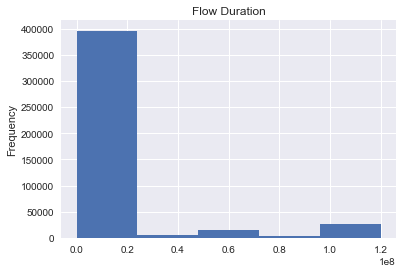

In [21]:
# análise de distribuição
df[' Flow Duration'].plot(kind='hist', title='Flow Duration', bins=5)
plt.show()

<p> Portanto, pode-se observar que, o dataset não é balanceado e precisa de balancear antes de levar para o modelo.</p>

In [22]:
# salvar o dataset processado em novo arquivo csv para utilizar no modelo
df.to_csv('data/dataset_processado.csv', index=False)

In [23]:
# importar dataset processado 
df = pd.read_csv('data/dataset_processado.csv')

In [24]:
# explorar as primeiras 10 linhas e colunas
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.86,107.35,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,88,900,9,4,600,2944,300,0,66.67,132.29,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1205,7,4,2776,2830,1388,0,396.57,677.27,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,88,511,7,4,452,370,226,0,64.57,110.28,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,773,9,4,612,2944,306,0,68.00,134.93,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,88,986,9,6,3100,3030,1550,0,344.44,683.49,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,88,935,9,6,3074,3010,1537,0,341.56,677.75,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,389,572849,15,12,4076,1020,1646,0,271.73,562.94,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,49193,1,2,1,0,0,0,0,0.00,0.00,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,88,1075,9,9,3100,3030,1550,0,344.44,683.49,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [25]:
# ver as informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

<h2>Balanceamento de dados<h2>

In [26]:
# criar atributos independentes e dependentes
columns = df.columns.tolist()
# filtrar as colunas para remover os dados que não necessitamos
columns = [c for c in columns if c not in [" Label"]]
# Salvar a variável que vai ser utilizada na predição (etiquetas)
target = " Label"
# definir random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))
# imprimir as quantidades de linhas e colunas que contem as duas etiquetas
print(X.shape)
print(Y.shape)

(445909, 78)
(445909,)


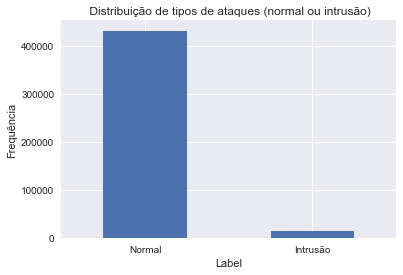

In [27]:
# contar quantos etiquetas de zeros e um contém no dataset
LABELS =["Normal","Intrusão"]
count_classes = pd.value_counts(df[' Label'], sort = True)
count_classes.plot(kind='bar', rot = 0)
plt.title(" Distribuição de tipos de ataques (normal ou intrusão)")
plt.xticks(range(2), LABELS)
plt.xlabel("Label")
plt.ylabel("Frequência")
plt.show()

<p style= "text-align:justify">Logo, pode-se observar que, o dataset não está balanceado, porque a quantidade de resultado de intrusão é muito menor do que a quantidade de não ocorrer a intrusão. Consequentemente, quando aplicar o modelo de classificação para este dataset o resultado de classificação é influenciado (bias) ao resultado de que não ocorre a intrusão no sistema.</p>

In [28]:
## Obter a quantidade de dados com etiqueta de intrusão e normal

intrusao = df[df[' Label']==1]

normal = df[df[' Label']==0]

print(intrusao.shape, normal.shape)

(13835, 79) (432074, 79)


<p>Observa-se que, quase 432074 linhas pertence ao dados com etiqueta normal, e apenas 13835 linhas pertence ao dados com etiqueta com intrusão. Então pode-se concluir que o dataset não está balanceado.</p>

In [29]:
# Carregar as bibliotecas para balanceamento de dados
from imblearn.under_sampling import NearMiss

In [30]:
# Implementar o balanceamento de dados com a tecnica de downsampling da biblioteca de imblearn
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,Y)

In [31]:
X_res.shape, y_res.shape

((27670, 78), (27670,))

In [32]:
from collections import Counter
print('Dataset Original shape {}'.format(Counter(Y)))
print('Dataset Balanceado shape {}'.format(Counter(y_res)))

Dataset Original shape Counter({0: 432074, 1: 13835})
Dataset Balanceado shape Counter({0: 13835, 1: 13835})


<p>Pode-se observar que o dataset está balanceado, porque a quantidade de dados com etiqueta normal e intrusão são distribuidos igualmente.</p>

<h2> Análise de componente principal ou PCA (Principal component analysis)</h2>

In [33]:
# normalizar os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_res)

In [34]:
# plicar a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None, svd_solver='full')
pca.fit(X_scaled)

PCA(svd_solver='full')

In [35]:
# imprimir os autovalores e autovetores (componentes principais)
print("Autovetores e Autovalores:")
print(pca.explained_variance_)
print()

Autovetores e Autovalores:
[3.26724224e+01 6.84650993e+00 3.94737948e+00 3.04571824e+00
 2.29497995e+00 1.83456848e+00 1.48614583e+00 1.18673189e+00
 9.52114363e-01 8.96899434e-01 7.52251007e-01 7.33649370e-01
 5.94371165e-01 2.87022265e-01 1.01293376e-01 8.53851994e-02
 8.09934336e-02 5.72852525e-02 3.59034225e-02 2.65910158e-02
 2.31662226e-02 1.24961473e-02 8.99388723e-03 7.16030356e-03
 6.23815117e-03 5.79304531e-03 4.52762078e-03 3.49421729e-03
 3.24405274e-03 2.11977677e-03 1.91147097e-03 1.35173915e-03
 1.02704435e-03 6.00804403e-04 4.20663674e-04 3.06261017e-04
 2.50273114e-04 2.26965293e-04 1.83070971e-04 1.22880893e-04
 8.39856812e-05 6.64670516e-05 3.93375675e-05 2.55136533e-05
 1.37631279e-05 8.18798430e-06 3.90465727e-06 3.43903922e-06
 1.48258639e-06 3.70541777e-16 6.77096611e-30 2.25776316e-31
 2.25776316e-31 2.25776316e-31 2.25776316e-31 2.25776316e-31
 2.25776316e-31 2.25776316e-31 2.25776316e-31 2.25776316e-31
 2.25776316e-31 2.25776316e-31 2.25776316e-31 2.25776316e-

In [36]:
# obter o parâmetro explained_variance_ratio_ em porcentagem, que mostra a porcentagem da representativadade de cada componente.

print("Representatividade das Variações dos Componentes Principais (%):")
print(pca.explained_variance_ratio_*100)
print("\n")

Representatividade das Variações dos Componentes Principais (%):
[5.63297270e+01 1.18039009e+01 6.80558072e+00 5.25104856e+00
 3.95671899e+00 3.16293480e+00 2.56222780e+00 2.04601551e+00
 1.64151716e+00 1.54632245e+00 1.29693762e+00 1.26486699e+00
 1.02474084e+00 4.94848090e-01 1.74637440e-01 1.47210541e-01
 1.39638804e-01 9.87641073e-02 6.19002154e-02 4.58449221e-02
 3.99403197e-02 2.15443028e-02 1.55061417e-02 1.23449048e-02
 1.07550443e-02 9.98764819e-03 7.80596060e-03 6.02429484e-03
 5.59299224e-03 3.65465545e-03 3.29552050e-03 2.33050051e-03
 1.77070213e-03 1.03583222e-03 7.25255985e-04 5.28017152e-04
 4.31489774e-04 3.91305328e-04 3.15628197e-04 2.11855952e-04
 1.44797665e-04 1.14594223e-04 6.78209411e-05 4.39874677e-05
 2.37286732e-05 1.41167041e-05 6.73192440e-06 5.92916368e-06
 2.55609105e-06 6.38842045e-16 1.16736576e-29 3.89255442e-31
 3.89255442e-31 3.89255442e-31 3.89255442e-31 3.89255442e-31
 3.89255442e-31 3.89255442e-31 3.89255442e-31 3.89255442e-31
 3.89255442e-31 3.89

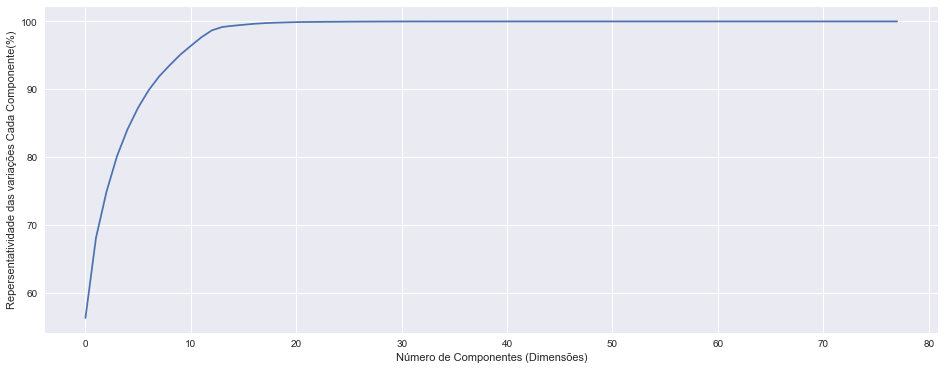

In [37]:
# plotar no gráfico para ver a representatividade de todos os componentes.
plt.figure(figsize=(16,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Número de Componentes (Dimensões)")
plt.ylabel("Repersentatividade das variações Cada Componente(%)")
plt.show()

<p style ="text-align:justify">Pode-se observar que, só o primeiro componente captura cerca de 56,33% de variabilidade nos dados e o segundo componente captura cerca de 10,18% de variabilidade nos dados e assim por diante. Os primeiros 15 componentes juntos capturam cerca de 99,36% de variabilidade nos dados. Logo, estamos interessados em manter estes primeiros 15 componentes para aplicar no modelo de aprendizagem de máquina.</p>
<hr>
<p style="text-align:justify">Feito isso, agora pode-se rodar de novo o PCA para estes 15 componentes e o aplicar no modelo de aprendizagem de máquina.</p>

In [38]:
# normalizar os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_res)

In [39]:
# aplicar PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# obter novo dataset transformado
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())

         0         1         2         3         4         5         6   \
0 -3.109759 -0.383784 -1.429179 -0.287152  1.102392  0.389615 -0.233798   
1 -3.110744 -0.385096 -1.426542 -0.287578  1.113835  0.396911 -0.235323   
2 -3.111048 -0.385501 -1.425730 -0.287710  1.117350  0.399185 -0.235796   
3 -3.109892 -0.383962 -1.428820 -0.287210  1.103950  0.390598 -0.234004   
4 -3.109371 -0.383268 -1.430220 -0.286983  1.097858  0.386771 -0.233202   

         7         8         9         10        11        12        13  \
0  0.055625 -0.166207 -0.448956  0.065636  0.595560 -0.325120 -1.330070   
1  0.058087 -0.173944 -0.441073  0.046658  0.589550 -0.314130 -1.328726   
2  0.058851 -0.176335 -0.438637  0.040802  0.587694 -0.310740 -1.328312   
3  0.055958 -0.167256 -0.447887  0.063060  0.594745 -0.323627 -1.329888   
4  0.054662 -0.163162 -0.452057  0.073115  0.597927 -0.329454 -1.330600   

         14  
0 -0.301119  
1 -0.302074  
2 -0.302367  
3 -0.301249  
4 -0.300740  


In [41]:
print('Nova Dimensão de Dados Transformados por PCA:')
X_pca.shape

Nova Dimensão de Dados Transformados por PCA:


(27670, 15)

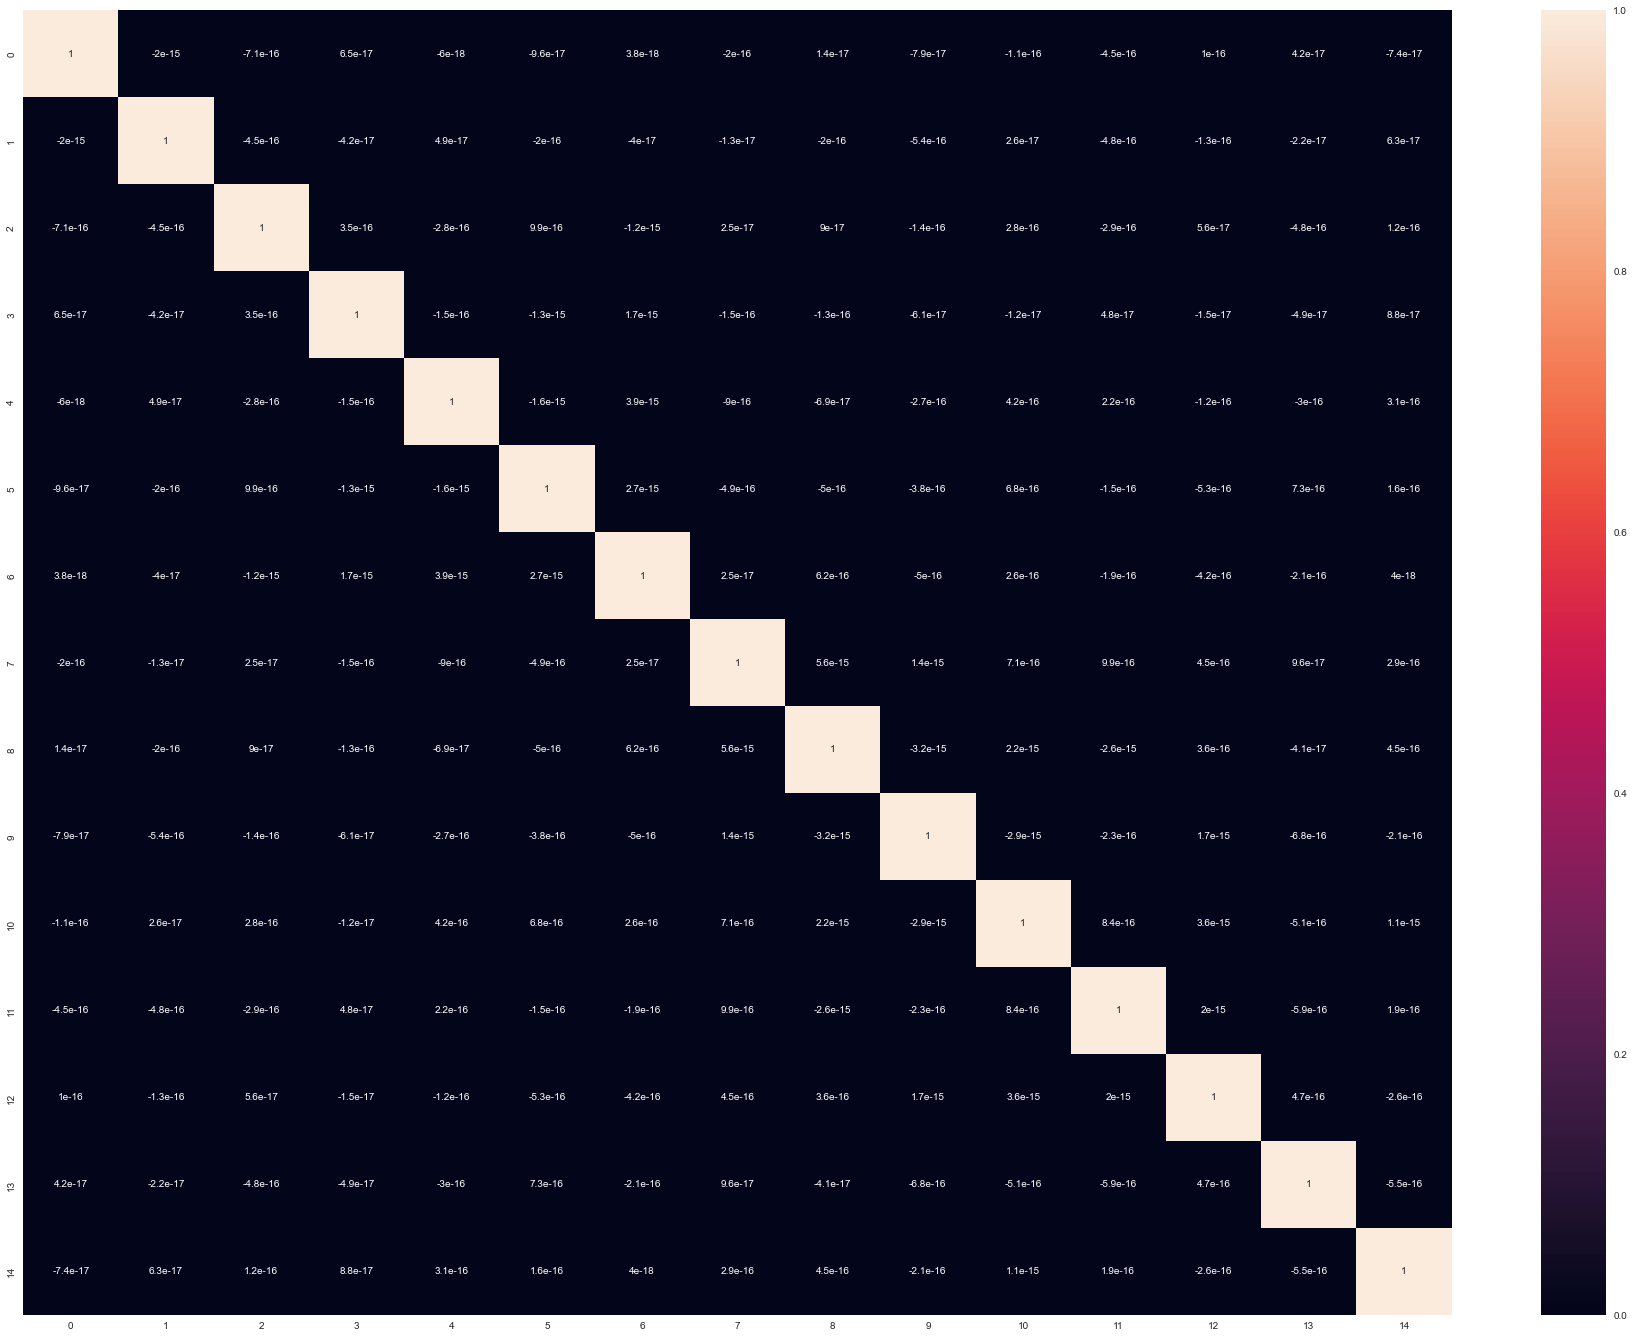

In [42]:
# verificar pela análise correlacional
fig = plt.figure(figsize=(32, 24))
sns.heatmap(X_pca.corr(), 
            annot=True)
plt.show()

<hr>
<p style="text-align:justify">Pode-se observar que, nenhuma correlação entre os componentes. Isto porque o PCA transformou o conjunto de variáveis correlacionadas no conjunto de dados original em um conjunto de variáveis não correlacionadas.</p>
<hr>
<h2> Aplicação do modelo de aprendizagem de máquina random forest classifier </h2>

In [43]:
# atribuir os valores de X e y
X = X_pca
y = y_res

# fazer separação de dados em teste e treinamento
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, shuffle=True, random_state=2)

# inicializar o modelo de Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=30,max_depth=10,random_state=1)

# modelo de treinamento 
random_forest.fit(X_train,y_train)

# fazer a classificação
y_pred = random_forest.predict(X_test)

# avaliar o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nAcurácia de teste:")
print(accuracy_score(y_test,y_pred))
print("\nPrecisão de teste:")
print(precision_score(y_test,y_pred))
print("\nRecall:")
print(recall_score(y_test,y_pred))
print("\nF1:")
print(f1_score(y_test,y_pred))

# matriz de confusão
from sklearn.metrics import confusion_matrix
print("\n Matriz de Confusão:")
pd.DataFrame(
    confusion_matrix(y_test,y_pred),
    columns = ['Previsto Normal', 'Intrusão Previsto'],
    index = ['Verdadeiro Normal', 'Intrusão Verdadeiro']
)


Acurácia de teste:
0.9984099450708297

Precisão de teste:
0.9979768786127168

Recall:
0.998842927393694

F1:
0.9984097151944484

 Matriz de Confusão:


,Previsto Normal,Intrusão Previsto
Verdadeiro Normal,3454,7
Intrusão Verdadeiro,4,3453


<hr>
<h2>Aplicação do modelo de aprendizagem de máquina SVM (Support Vector Machine)<h2>

In [44]:
# atribuir os valores de X e y
X = X_pca
y = y_res

# fazer separação de dados em teste e treinamento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, shuffle=True, random_state=2)

# inicializar o modelo de Random Forest Classifier
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# criar o modelo
clf.fit(X,y)

# fazer a classificação
y_pred = clf.predict(X_test)


# avaliar o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nAcurácia de teste:")
print(accuracy_score(y_test,y_pred))
print("\nPrecisão de teste:")
print(precision_score(y_test,y_pred))
print("\nRecall:")
print(recall_score(y_test,y_pred))
print("\nF1:")
print(f1_score(y_test,y_pred))

# matriz de confusão
from sklearn.metrics import confusion_matrix
print("\n Matriz de Confusão:")
pd.DataFrame(
    confusion_matrix(y_test,y_pred),
    columns = ['Previsto Normal', 'Intrusão Previsto'],
    index = ['Verdadeiro Normal', 'Intrusão Verdadeiro']
)


Acurácia de teste:
0.9774501300954033

Precisão de teste:
0.9573288999722915

Recall:
0.9994214636968469

F1:
0.9779224455137278

 Matriz de Confusão:


,Previsto Normal,Intrusão Previsto
Verdadeiro Normal,3307,154
Intrusão Verdadeiro,2,3455


<hr>
<h2> Conclusão <h2>

<p style="text-align:justify">
    <li>A partir dos resultados dos modelos (SVC e Random Forest) acima, pode-se observar que, o modelo SVC tem um desempenho de teste em         torno de 97% e 98% e o modelo Random Forest tem o desempenho de teste em torno de 98% e 99%. Observe-se também que, ocorre bastante melhoria na precisão do modelo quando consideramos o balanceamento de dados. Porém sempre é bom testar em situação real (novo dataset ou em tempo real) para verificar de verdade o desempenho do modelo.</li>
    <hr>
    <li> Ao analisar a matriz de confusão em relação ao modelo SVC, visto que, o modelo consegue detectar estas classes diferentes (intrusão e não intrusão). Além disso, a matriz de confusão consegue diferenciar também os falsos negativos, falsos positivos, verdadeiro positivo e verdadeiro negativo dos resultados de classificação do modelo</li>.
    <hr>
    <li>Ao analisar a matriz de confusão em relação ao modelo Random Forest depois de balanceamento de dados, podemos dizer que, não ocorre problema porque o modelo consegue diferenciar as classes diferentes dos rótulos. Além disso, a matriz de confusão consegue diferenciar também os falsos negativos, falsos positivos, verdadeiro positivo e verdadeiro negativo do resultados de classificação do modelo.</li>
</p>